<a href="https://colab.research.google.com/github/meharsg/python/blob/main/ML_Exercises_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###K - Fold Cross Validation (1)

Many times we get in a dilemma of which machine learning model should we use for a given problem. KFold cross validation allows us to evaluate performance of a model by creating K folds of given dataset. This is better then traditional train_test_split.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import numpy as np
from statistics import mean

In [2]:
digits = load_digits()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [9]:
lr = LogisticRegression(max_iter=5000)   #to increase iterations as failed to converge
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9629629629629629

In [12]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9888888888888889

In [20]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

In [22]:
#now using k-fold (long)
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [23]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [25]:
#method to return score
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

get_score(LogisticRegression(max_iter=5000), X_train, X_test, y_train, y_test)

0.9629629629629629

In [26]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9888888888888889

In [27]:
get_score(RandomForestClassifier(n_estimators=50), X_train, X_test, y_train, y_test)

0.9703703703703703

In [29]:
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=10)

In [31]:
score_l = []
score_rf = []
score_svm = []

In [32]:
for train_index, test_index in kf.split(digits.data):
  X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
  score_l.append(get_score(LogisticRegression(max_iter=5000), X_train, X_test, y_train, y_test))
  score_rf.append(get_score(RandomForestClassifier(n_estimators=50), X_train, X_test, y_train, y_test))
  score_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))

In [34]:
score_l

[0.9282136894824707, 0.9415692821368948, 0.9165275459098498]

In [35]:
score_rf

[0.9382303839732888, 0.9582637729549248, 0.9248747913188647]

In [36]:
score_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [37]:
#above code will be replaced with crossval method
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(LogisticRegression(max_iter=5000), digits.data, digits.target)

array([0.925     , 0.87777778, 0.93871866, 0.93314763, 0.89693593])

In [42]:
mean(cross_val_score(LogisticRegression(max_iter=5000), digits.data, digits.target))

0.9143160012380068

In [56]:
cross_val_score(SVC(kernel='rbf'), digits.data, digits.target, cv=10)   #more accurate than linear kernel

array([0.94444444, 0.98888889, 0.92777778, 0.96666667, 0.98333333,
       0.98888889, 0.98888889, 0.99441341, 0.96089385, 0.95530726])

In [59]:
mean(cross_val_score(SVC(), digits.data, digits.target, cv=10))

0.9699503414028554

In [58]:
cross_val_score(RandomForestClassifier(n_estimators=50), digits.data, digits.target, cv=10)

array([0.9       , 0.96666667, 0.93888889, 0.92777778, 0.95555556,
       0.96666667, 0.96111111, 0.97206704, 0.9273743 , 0.93854749])

In [64]:
mean(cross_val_score(RandomForestClassifier(n_estimators=50), digits.data, digits.target, cv=10))   #best result with 50 trees

0.9487988826815643

###K - Fold Cross Validation (2)

In [65]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from sklearn.model_selection import cross_val_score

In [66]:
iris = load_iris()

In [67]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

**Logistic Regression**

In [74]:
score_lr = cross_val_score(LogisticRegression(max_iter=200), iris.data, iris.target, cv=10)   #cv is number of folds
mean(score_l)

0.9733333333333334

**Random Forest**

In [84]:
score_rfc = cross_val_score(RandomForestClassifier(n_estimators=50), iris.data, iris.target, cv=10)
mean(score_rfc)

0.96

**Decision Tree**

In [77]:
score_tree = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target, cv=10)
mean(score_tree)

0.96

**SVM**

In [88]:
score_svm = cross_val_score(SVC(), iris.data, iris.target, cv=10)
mean(score_svm)

0.9733333333333334

Here we can see that Logistic Regression and SVM are most accurate with an accuracy of 97.34%

###K Means Clustering (1)

To divide given data into clusters.

In [1]:
from google.colab import files
import io
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving income.csv to income.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['income.csv']))

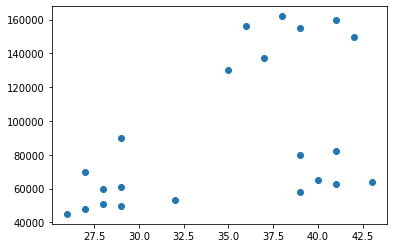

In [5]:
plt.scatter(df.Age, df['Income($)'])

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [9]:
df['cluster'] = y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

No handles with labels found to put in legend.


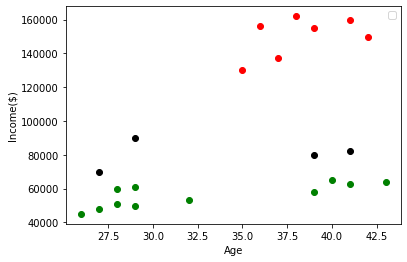

In [10]:
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')

We can see we ran into some problems here due to lack of scaling of data. So now we'll preprocess our data using MinMaxScaler.

In [14]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])    #scales data between 0 to 1
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

In [15]:
#using k means again we have
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted

Text(0, 0.5, 'Income($)')

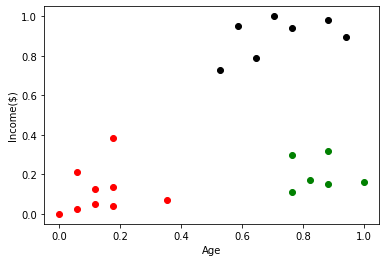

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [18]:
#to get coordinates of centroids of clusters
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

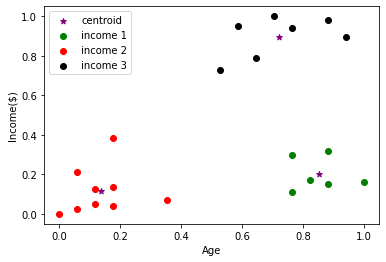

In [17]:
#to plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')   
plt.scatter(df1.Age, df1['Income($)'], color='green', label='income 1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='income 2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='income 3')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

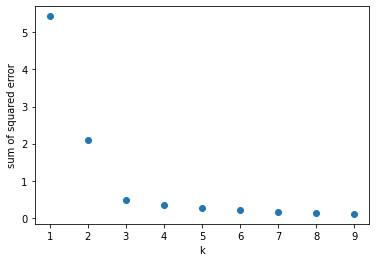

In [19]:
#for elbow technique
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)   #km.inertia_ gives us sum of squared error

plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.scatter(k_rng, sse)

Therefore from the plot we can see that it elbows at k=3.

###K Means Clustering (2)

>1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

2. Figure out if any preprocessing such as scaling would help here

3. Draw elbow plot and from that figure out optimal value of k

In [21]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [22]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)

In [31]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


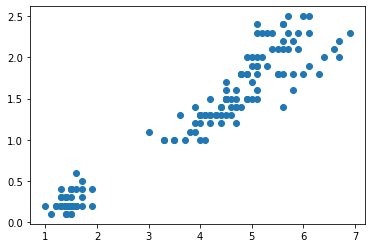

In [32]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [34]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_predicted

In [36]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

Text(0, 0.5, 'petal width (cm)')

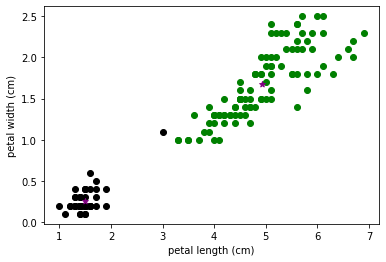

In [38]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='cluster 1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='black', label='cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

We see a problem with 1 datapoint, so lets try and scale the data.

In [40]:
scaler = MinMaxScaler()
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])

In [41]:
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_predicted

Text(0, 0.5, 'petal width (cm)')

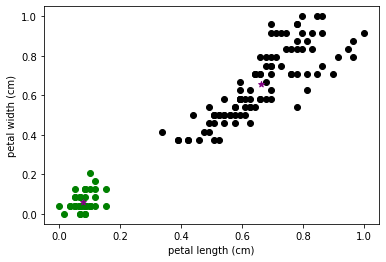

In [42]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='cluster 1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='black', label='cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

We see that scaling fixed the problem!

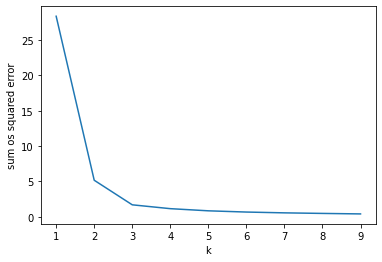

In [43]:
#for elbow technique
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)', 'petal width (cm)']])
  sse.append(km.inertia_)

plt.xlabel('k')
plt.ylabel('sum os squared error')
plt.plot(k_rng, sse)

We see that the data elbows at k=3.

So now we try to cluster the data with k=3.

In [44]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_predicted

Text(0, 0.5, 'petal width (cm)')

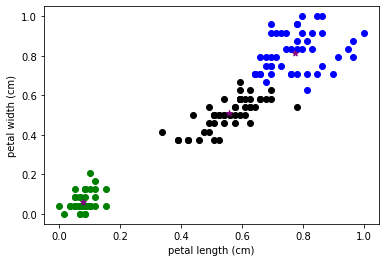

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='cluster 1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='black', label='cluster 2')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Lo and behold, we get 3 clusters!

###Naive Bayes (1)

Using Naive Bayes classifier, we are going to build a spam detector for emails.

In [1]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()

Saving spam.csv to spam.csv


In [2]:
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']))

In [4]:
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [ ]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)   #creates spam column where spam=1, ham=0
df

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.8)

In [10]:
#now we vectorize words in message column
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()

In [27]:
X_train_count = v.fit_transform(X_train)   
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9751009421265141

In [30]:
#to make transformation step less cumbersome, we can create a pipeline
from sklearn.pipeline import Pipeline
clf = Pipeline ([
                 ('vectorizer', CountVectorizer()), 
                 ('nb', MultinomialNB())
])

In [31]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9751009421265141

###Naive Bayes (2)

Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()

In [2]:
dir(wine)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.data

In [7]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df['target'] = wine.target
df

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2)

**Gaussian Naive Bayes**

In [12]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [13]:
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
nb.score(X_test, y_test)

0.9444444444444444

**Multinomial Naive Bayes**

In [15]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [16]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
mnb.score(X_test, y_test)

0.8611111111111112

Accuracy with Gaussian Naive Bayes = 94.44%

Accuracy with Multinomial Naive Bayes = 86.11%

Therefore, Multinomial Naive Bayes does better than Gaussian Naive Bayes.

###Hyperparameter Tuning (1)

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from sklearn import svm

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])

In [10]:
from sklearn.model_selection import cross_val_score
kernel = ['rbf', 'linear']
C = [1, 10, 20]
avg_score = {}
for kval in kernel:
  for cval in C:
    cv_scores = cross_val_score(svm.SVC(kernel=kval, C=cval, gamma='auto'), iris.data, iris.target, cv=5)
    avg_score[kval + '_' + str(cval)] = np.average(cv_scores)

avg_score

{'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666,
 'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668}

Here, the best average scores are obtained when the parameters are:

>kernel = linear, C = 1

>kernel = rbf, C = 1, 10

In [ ]:
#to do the same thing with less code we use GridSearchCV

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
              'C':[1, 10, 20],
              'kernel':['linear', 'rbf']
      }, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_

In [17]:
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000837,0.000315,0.000575,0.000382,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000622,0.000014,0.000335,0.000026,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001623,0.000609,0.000590,0.000078,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
3,0.000791,0.000170,0.000419,0.000067,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.000617,0.000121,0.000367,0.000049,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6
5,0.000706,0.000084,0.000385,0.000037,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [20]:
result[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'C': 1, 'kernel': 'linear'}",0.980000,1
1,"{'C': 1, 'kernel': 'rbf'}",0.980000,1
2,"{'C': 10, 'kernel': 'linear'}",0.973333,4
3,"{'C': 10, 'kernel': 'rbf'}",0.980000,1
4,"{'C': 20, 'kernel': 'linear'}",0.966667,6
5,"{'C': 20, 'kernel': 'rbf'}",0.966667,5


In [22]:
clf.best_score_   #returns best score

0.9800000000000001

In [23]:
clf.best_params_   #returns best params

{'C': 1, 'kernel': 'linear'}

GridSearchCV can be computationally expensive in case of large datasets and many parameters. To tackle this we can use RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
                  'C':[1, 10, 20],
                  'kernel':['linear', 'rbf']
}, cv=5, return_train_score=False, n_iter=5)
rs.fit(iris.data, iris.target)
result = pd.DataFrame(rs.cv_results_)
result[['params', 'mean_test_score', 'rank_test_score']]

Now, to choose best model:

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
#initiliazing a dictionary
model_params = {
    
    'svm': {
       'model':svm.SVC(gamma='auto'),
       'params': {
           'C':[1, 10, 20],
           'kernel':['linear', 'rbf']
       } 
    },

    'random_forest': {
        'model':RandomForestClassifier(),
        'params': {
            'n_estimators':[1, 5, 20]
        }
    },

    'logistic_regression': {
        'model':LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C':[1, 5, 10]
        }        
    }
}

#now we create a for loop to iterate through values in dictionary above

scores = []
for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(iris.data, iris.target)
  scores.append({
      'model': model_name, 
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [34]:
model_result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
model_result

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.953333,{'n_estimators': 1}
2,logistic_regression,0.966667,{'C': 5}


Therefore, SVM performs best with C= 1, kernel= linear parameters for the iris flower dataset.

###Hyperparamter Tuning (2)

To find optimal model and parameters for digits dataset.

In [40]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [36]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [50]:
#initializing a dictionary with models and parameters

model_params = {
    
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['linear', 'rbf']
        }
    },

      'decision_tree': {
          'model': DecisionTreeClassifier(),
          'params': {
              'criterion': ['gini', 'entropy']
          }
      },

      'random_forest': {
          'model': RandomForestClassifier(),
          'params': {
              'n_estimators': [70 ,80 ,90, 100],
              'criterion': ['gini', 'entropy']
          }
      }, 

      'gaussian_nb': {
          'model': GaussianNB(),
          'params': {}
      },

      'multinomial_nb': {
          'model': MultinomialNB(),
          'params': {}
      }
    }




In [51]:
scores = []
for model_name, mp in model_params.items():

  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(digits.data, digits.target)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,decision_tree,0.812485,{'criterion': 'entropy'}
2,random_forest,0.941591,"{'criterion': 'gini', 'n_estimators': 70}"
3,gaussian_nb,0.806928,{}
4,multinomial_nb,0.870350,{}


Therefore the best model is SVM with C= 1, kernel= linear for digits dataset, with an accuracy of 94.77%.

Random forest is a close second with n_estimators= 70, criterion= entropy and an accurace of 94.16%

###L1 and L2 Regularization

Technique used to address overfitting issues by adding a parameter penalty to mean squared error.

In [52]:
import pandas as pd
from google.colab import files
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import io

In [53]:
uploaded = files.upload()

Saving melbourne_housing.csv to melbourne_housing.csv


In [55]:
df = pd.read_csv(io.BytesIO(uploaded['melbourne_housing.csv']))

>1. Cleaning Data

In [56]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.drop(['Address', 'Method', 'Postcode', 'YearBuilt', 'Lattitude', 'Longtitude'], axis=1, inplace=True)
df

In [59]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
SellerG              0
Date                 0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [60]:
cols_zero = ['Propertycount', 'Car', 'Distance', 'Bedroom2', 'Bathroom']
df[cols_zero] = df[cols_zero].fillna(0)

In [61]:
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())

In [63]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
SellerG             0
Date                0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

In [64]:
df.dropna(inplace=True)

>2. Creating Dummies

In [65]:
df = pd.get_dummies(df, drop_first=True)

In [69]:
X = df.drop('Price', axis=1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [85]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.49800939957827606

In [71]:
model.score(X_train, y_train)

0.6960465512011103

Here, we can see that accuracy of model on training data is 69%, whereas on test data it's only 49%.

Trying L1 and L2 Regularization we have:

In [84]:
lasso = linear_model.Lasso(alpha=50, max_iter=1000, tol=0.1)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.5034573191568241

In [78]:
lasso.score(X_train, y_train)

0.6920790172400808

In [79]:
ridge = linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.4836173461658556

In [80]:
ridge.score(X_train, y_train)

0.6777426312975576